<div style="background-color: #00796B; text-align: center; padding: 20px;">
    <p style="color: white; font-size: 36px;">Dog and Cat Classification</p>
    <p style="color: white;">by: Kelompok 4</p>
</div>

<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Library Area</p>
</div>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random
import os
print(os.listdir("dataset"))

['.DS_Store', 'single_prediction', 'test_set', 'training_set']


<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Training Dataset</p>
</div>

In [12]:
cat_dataset = os.listdir("./dataset/training_set/cats/")
dogs_dataset = os.listdir("./dataset/training_set/dogs/")

cat_dataset.remove('.DS_Store')
dogs_dataset.remove('.DS_Store')

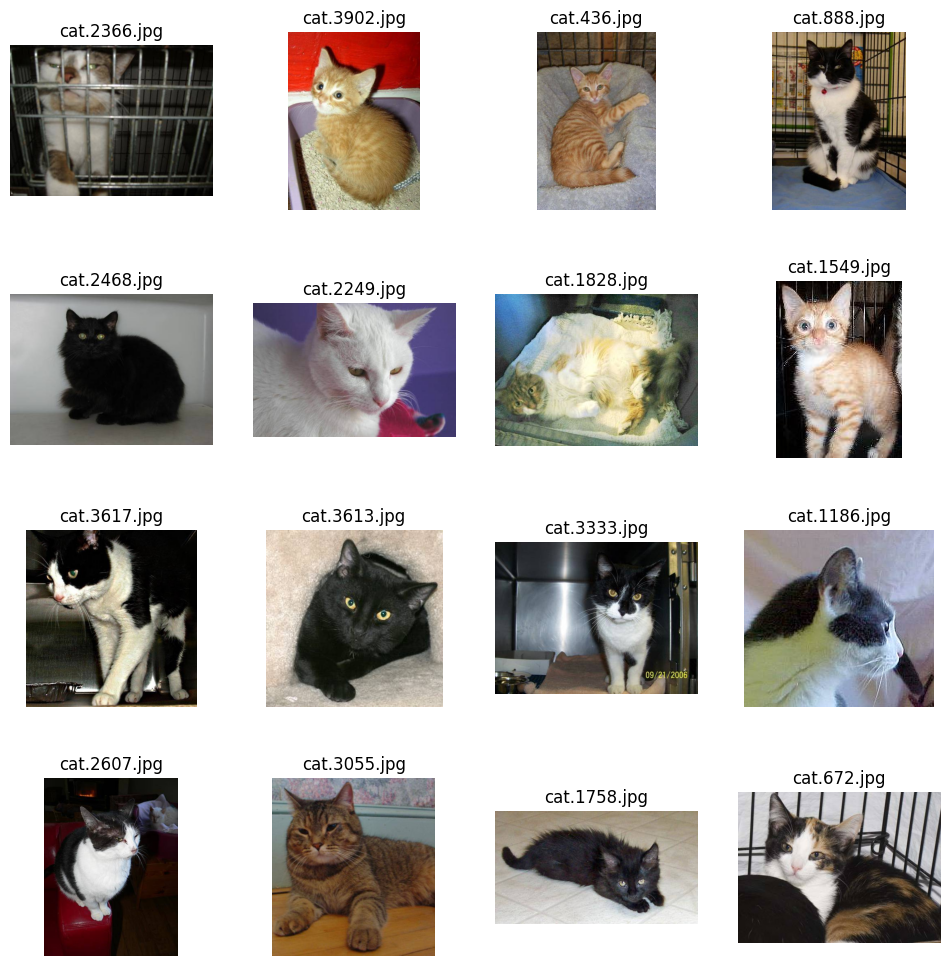

In [13]:
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, n_rows*n_cols):
    index = np.random.randint(0, len(cat_dataset))
    img = plt.imread('./dataset/training_set/cats/' + cat_dataset[index])
    axes[i].imshow(img)
    axes[i].set_title(cat_dataset[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

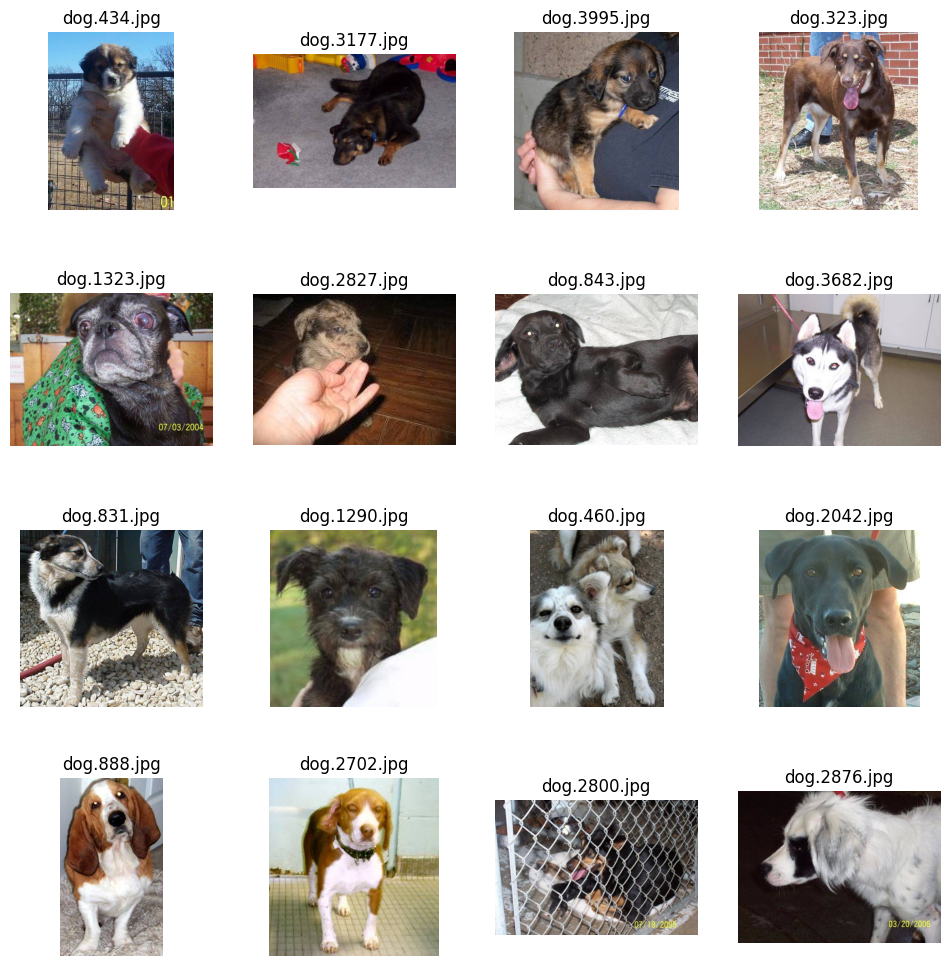

In [15]:
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, n_rows*n_cols):
    index = np.random.randint(0, len(dogs_dataset))
    img = plt.imread('./dataset/training_set/dogs/' + dogs_dataset[index])
    axes[i].imshow(img)
    axes[i].set_title(dogs_dataset[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()